# Qiskit入門

Yuri Kobayashi, IBM Quantum (Mar 25, 2025)

セルを選択して「Shift」＋「Enter」で実行できます。

Google Colab で行う場合は、次のセルの「#」を削除して実行します。

In [ ]:
#!pip install qiskit qiskit-ibm-runtime qiskit-aer qiskit[visualization]

qBraid で行う場合は、右上の「Python 3[Default]」をクリックして「Python 3[QDC24]」を選択し、次のセルの「#」を削除して実行したあと、上部の「Kernel」→「Restart Kernel...」からカーネルをリスタートしてください。

In [ ]:
#!pip install pylatexenc
#!sudo apt install graphviz --yes

In [1]:
# Qiskitバージョンの確認
import qiskit
qiskit.__version__

'1.4.2'

### 目次:
1. 1量子ビット回路をつくってみよう
2. 2量子ビット回路をつくってみよう
3. 量子もつれと実デバイスでの測定
4. 量子テレポーテーション

In [4]:
# Qiskitライブラリーを導入

#量子回路インスタンスを作成するクラス
from qiskit import QuantumCircuit

#量子シミュレーター
from qiskit_aer import StatevectorSimulator, AerSimulator

#量子回路をハードウェア（実機）で実行する前に回路を最適化してくれるトランスパイラーパス
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager 

#IBM Cloud経由の量子回路の実行環境
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 #量子回路の出力をサンプリングしてくれる

#各種視覚ツール
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_gate_map

#数値計算用のライブラリ
import numpy as np

## 1. 1量子ビット回路
まず1量子ビット回路から始めます。

### 空の回路

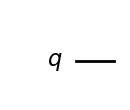

In [5]:
# １量子ビット回路を用意
qc = QuantumCircuit(1)

# 回路を描画
qc.draw(output="mpl")

### Xゲート

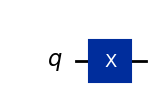

In [6]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意

# Xゲートを0番目の量子ビットに操作します。
qc.x(0)

# 回路を描画
qc.draw(output="mpl")

Qiskitでは、各量子ビットの初期状態は$|0\rangle$にセットされていますので、上記の量子回路は、行列ベクトル表示では

$X|0\rangle=  \begin{pmatrix}
0 & 1 \\\
1 & 0
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\begin{pmatrix}
0 \\\
1
\end{pmatrix} = |1\rangle$ 

となります。次にこの回路の出力ベクトルを状態ベクトルシミュレーターを使って実行してみます。

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


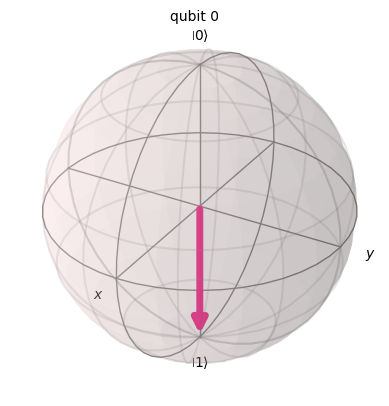

In [7]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result)

縦ベクトルが横ベクトル表示で、複素数(虚部の添字は j )で表示されています。

### Hゲート
いよいよ量子コンピューターならではの操作、「重ね合わせ」をつくっていきます。

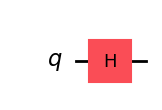

In [9]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意 

# 重ね合わせをつくるには、Hゲートを量子ビットに操作します。
qc.h(0)

# 回路を描画
qc.draw(output="mpl")

　つづいて先程と同じように状態ベクトルシミュレーターをつかって回路を実行し、ブロッホ球で表示させます。

Statevector([0.707+0.j, 0.707+0.j],
            dims=(2,))


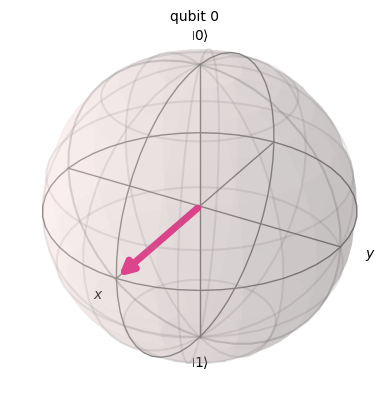

In [11]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result)

これは、$H|0\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}（|0\rangle+|1\rangle)$ です。




つまり、$H$ゲートを$|0\rangle$に実行すると、$|0\rangle$と$|1\rangle$の均等な重ね合わせ状態が作れることが分かります。

### $|-\rangle$ 状態
次に、マイナスの量子状態$|-\rangle$をつくってみましょう。

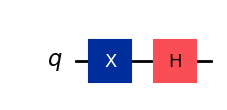

In [12]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意 

# Xゲートを0番目の量子ビットに操作します。
qc.x(0)

# 次にHゲートを0番目の量子ビットに操作します。
qc.h(0)

# 回路を描画
qc.draw(output="mpl")

Statevector([ 0.707-0.j, -0.707+0.j],
            dims=(2,))


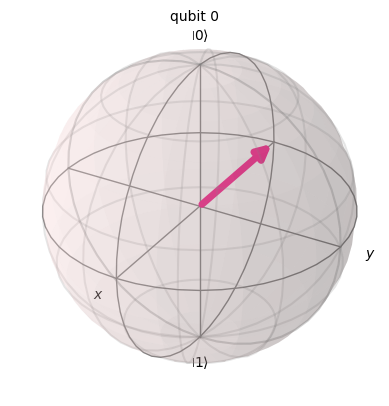

In [13]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result)

$H|1\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
0 \\\
1
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
-1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
-0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}（|0\rangle-|1\rangle)$


$|1\rangle$に$H$ゲートを実行した結果、$|0\rangle$と$|1\rangle$の均等な重ね合わせ状態になりますが、$|1\rangle$の符号がマイナスになります。

マイナス$|-\rangle$  の符号はプラス$|+\rangle$  と直行する基底になり量子計算において位相という概念をもたらします。この位相が「干渉」をおこすように

## 2. 2量子ビット回路

演習2−1：2量子ビットの回路をつくり、各量子ビットにアダマールゲートを操作して回路を描画してみましょう。

In [ ]:
# ２量子ビット回路を作成します。
qc = QuantumCircuit(2)

# Hゲートを0番目の量子ビットに操作します。
qc.h(0)

# Hゲートを1番目の量子ビットに操作します。
qc.h(1)

# 回路を描画
qc.draw(output="mpl")

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

２量子ビットの状態は、１量子ビットの積（テンソル積）で表せます。

$|q0\rangle \otimes|q1\rangle = (a|0\rangle+b|1\rangle) \otimes (c|0\rangle+d|1\rangle) $

$= ac|0\rangle|0\rangle+ad|0\rangle|1\rangle+bc|1\rangle|0\rangle+bd|1\rangle|1\rangle$

$= ac|00\rangle+ad|01\rangle+bc|10\rangle+bd|11\rangle$

(ただし、$|ac|^2+ |ad|^2+ |bc|^2+ |bd|^2=1$ )


Qiskitの初期値は、$|0\rangle|0\rangle=|00\rangle$なので、$H$をそれぞれの量子ビットに操作させることで均等な重ね合わせの状態になります。

$H|0\rangle \otimes H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) = \frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)$

$$ 
=\frac{1}{2}\left( \begin{bmatrix} 1 \\ 1 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 1 \end{bmatrix}\right) = \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}=\frac{1}{2}\left(\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}\right)
$$


In [ ]:
# ブロッホ球の表示
plot_bloch_multivector(result)

## 3. 量子もつれと実デバイスでの測定
エンタングルメント状態を作り実デバイスで測定してみます。

2量子ビットの量子もつれ状態の1つの例が次のような形になります。(ベル状態と呼ばれます。)
$$\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$$

これは、「片方の量子ビットが$|0\rangle$の場合に、もう片方の量子ビットも$|0\rangle$になっている」状態と、「片方の量子ビットが$|1\rangle$の場合に、もう片方の量子ビットも$|1\rangle$になっている」状態の重ね合わせ状態になっています。つまり、片方の量子ビットの状態が決まると、残りの量子ビットが確定するような状態となっています。また別の言い方をすると、$|00\rangle$と$|11\rangle$という2つのデータが半々の確率で観測されることを示しています。<br>

上記の状態をつくるには、まず量子ビット$q_0$に$H$ゲートをかけて重ね合わせの状態にします。つまり、
$$ |00\rangle \rightarrow  \frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|01\rangle  $$

その後、量子ビット$q_0$をコントロールビット、量子ビット$q_1$をターゲットビットとして、CXゲートを作用させます。これによって、右のビットが1の項のみ、左のビットが反転されます。
$$ \frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|01\rangle \rightarrow \frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|11\rangle $$

では、実際にこの量子状態を作ってみましょう。<br>


In [ ]:
# ２量子ビット回路を作成します。
qc = QuantumCircuit(2,2)    # 2量子ビット, 2古典ビットレジスター

# ゲートを適用します。
# Hゲートをq0に適用
qc.h(0)
# CXゲートをq0からq1に適用
qc.cx(0,1)    

# 測定ゲートを追加
qc.measure(0,0)    # 量子ビットq0を測定して、古典レジスターc0に入れます
qc.measure(1,1)    # 量子ビットq1を測定して、古典レジスターc1に入れます

# 回路を描画
qc.draw(output="mpl")

まず、AerSimulator（量子計算シミュレーター）で計算させ、測定します。1024回実行した結果、それぞれの状態が測定された回数を表示し、その測定確率をヒストグラムで表示します。

In [ ]:
# シミュレーターで実験
backend = AerSimulator()
sampler = SamplerV2(backend)
job = sampler.run([qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(counts)

## ヒストグラムで測定された確率をプロット
plot_histogram( counts )

$|00\rangle$と$|11\rangle$がほぼ同じ割合で測定されました。

次に、以下のコードを実行して実デバイスで計算してみましょう。

In [ ]:
# アカウント情報をロードして、使える量子デバイスを確認します

# local環境で初めて実行する場合は、認証情報をディスクに保存します。
# API tokenを[IBM Quantum Platform](https://quantum.ibm.com/)で確認してください。
# QiskitRuntimeService.save_account(channel='ibm_quantum', token='<your_token>', overwrite=True)

service = QiskitRuntimeService()
service.backends()

In [ ]:
# 以下でデバイスを指定できます。
backend = service.backend('ibm_kyiv')

In [ ]:
#一番空いているバックエンドを自動的に選択することもできます
backend = service.least_busy(operational=True)
print("最も空いているバックエンドは:  ", backend)

バックエンドのカップリングマップを見てみましょう。すべての量子ビットがつながっているのではなく、また、制御ゲートの実行できる方向にも制限があります。

In [ ]:
plot_gate_map(backend, figsize=(6,6), plot_directed=True, qubit_size=40, font_size=20)

また、バックエンドで実行可能な基本ゲートを見てみます。

In [ ]:
backend.basis_gates

このカップリングマップや基本ゲートは、量子プロセッサーによって異なります。参照：https://quantum.ibm.com/services/resources

実機で実行する前に、指定したバックエンドで実行可能なゲートと回路にトランスパイルする必要があります。

In [ ]:
# 実機で計算できる回路にトランスパイルします
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
target_circuit = pm.run(qc)

target_circuit.draw("mpl", idle_wires=False)

In [ ]:
# 実機のバックエンドで実行します
sampler = SamplerV2(backend)
job_real = sampler.run([target_circuit])

print("job id:", job_real.job_id())

In [ ]:
# ジョブの実行状態を確認します
job_real.status()

In [ ]:
# 待ち時間が長い時に後から結果を確認する場合
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()    
job_real = service.job('cxhwfrqvw7kg008sc9w0') # 例です。上に出力された自分のjob_idを入れて実行してください。

In [ ]:
# ジョブの実行状態を確認します
job_real.status()

In [ ]:
### 'DONE'になってから実行します ###
result_real = job_real.result()
print(result_real[0].data.c.get_counts())

plot_histogram(result_real[0].data.c.get_counts())

実機の量子コンピューターにはノイズが含まれます。より良い結果を得るためには、実行を早く終わらせるために回路を短くする工夫や、より精度の良い量子ビットの選択、量子回路を物理量子ビットへマップする際（トランスパイルの際）に回路が大きくならないようにする工夫が必要となります。トランスパイルの最適化は、 optimization_level で選択可能です。また、ノイズをソフトウェア的に緩和するエラー緩和の手法を使うなど、さまざまな手法が研究されています。

## 4. 量子テレポーテーション

In [ ]:
# 3量子ビット回路を用意
qc = QuantumCircuit(3,3)    

# Aliceのもつ暗号の量子状態ψを今回はRxで作ります
qc.rx(np.pi/3,0)
qc.barrier()    #回路を見やすくするために入れます

# 回路を描画
qc.draw(output="mpl")

In [ ]:
backend = StatevectorSimulator()
out_vector = backend.run(qc, shots=1).result().get_statevector() # set shots = 1

plot_bloch_multivector(out_vector)

In [ ]:
# 量子もつれを作ります
qc.h(1)
qc.cx(1, 2)
qc.barrier()    #回路を見やすくするために入れます

# 回路を描画
qc.draw(output="mpl")

In [ ]:
# AliceがCNOTとHで、自分の量子ビット2つをエンタングルさせ測定します。
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.measure(0, 0)
qc.measure(1, 1)

# 回路を描画
qc.draw(output="mpl")

In [ ]:
#Aliceが測定結果をBobに送り、Bobが結果に合わせて操作します
with qc.if_test((0, 1)): # 古典レジスター0の値が1だったらZゲートをq2にかける
    qc.z(2)
with qc.if_test((1, 1)): # 古典レジスター1の値が1だったらXゲートをq2にかける
    qc.x(2)
    
qc.draw(output="mpl")

量子テレポーテーション回路が完成しました。qubit2にqubit0の量子状態($R_x(\pi/3)$)が転送されていることを確認しましょう。

In [ ]:
backend = StatevectorSimulator()
out_vector = backend.run(qc,shots=1).result().get_statevector()

plot_bloch_multivector(out_vector)

Bobに暗号の量子状態が転送されたことを確認するために、最後にBobの量子ビットに逆向きのX軸回転を適用して、シミュレーターで実験し、測定結果が0になることを確認します。

In [ ]:
# 3量子ビット回路を用意
qc = QuantumCircuit(3,3)  

# Aliceのもつ未知の量子状態ψをRxで作ります。角度はπ/3にしました。
qc.rx(np.pi/3,0)
qc.barrier()    #回路を見やすくするために入れます

# 量子もつれを作ります
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# AliceがCNOTとHで自分の量子ビット2つをエンタングルさせ測定します。
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.measure(0, 0)
qc.measure(1, 1)

#Aliceが測定結果をBobに送り、Bobが結果に合わせて操作します
with qc.if_test((0, 1)): # 古典レジスター0の値が1だったらZゲートをq2にかける
    qc.z(2)
with qc.if_test((1, 1)): # 古典レジスター1の値が1だったらXゲートをq2にかける
    qc.x(2)

# 未知の量子状態ψの逆ゲートをかけて０が測定できるか確かめます
qc.rx(-np.pi/3, 2)    
qc.measure(2, 2)

qc.draw(output="mpl")

In [ ]:
# シミュレーターで実験
backend = AerSimulator()

# Samplerで実行
sampler = SamplerV2(backend)
job = sampler.run([qc])
result = job.result()


#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(counts)

# ヒストグラムで測定された確率をプロット
plot_histogram(counts)

qiskitのビット配列は右端が0なので、Bobのビット(qubit 2)は左端です。左端のビットが全て0になっていることが確認できましたか？

## 演習

量子テレポーテーション回路を自分で組んで表示してみましょう。<br>
今回は、未知の量子状態をY軸回転ゲート(`ry`を使います。角度は自由に決めます。)で作ってみましょう。<br>
Bobに未知の量子状態が転送されたことを確認するために、最後にBobの量子ビットに逆向きのY軸回転(角度にマイナスをつけます)を適用して、シミュレーターで実験し、測定結果が0になることを確認しましょう。

時間に余裕がある方は、実デバイスでも上記の実験を行ってみましょう。

In [ ]:
# 3量子ビット回路を用意
qc = QuantumCircuit(3,3)    

##量子テレポーテーションのコードを作ってください##
# Aliceのもつ未知の量子状態ψをRyで作ります。


# 量子もつれを作ります


# AliceがCNOTとHでψと自分のEPRペアをエンタングルさせ測定します。


#Aliceが測定結果をBobに送り、Bobが結果に合わせて操作します


# 未知の量子状態ψの逆向きの演算をかけて０が測定できるか確かめます


# 回路を描画
qc.draw(output="mpl")

In [ ]:
# シミュレーターで実験の際に使うコード例
backend = AerSimulator()

# Samplerで実行
sampler = SamplerV2(backend)
job = sampler.run([qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(counts)

# ヒストグラムで測定された確率をプロット
plot_histogram(counts)

In [ ]:
# Bobのビットの結果のみ抜き出します
bobs_qubit = 2
bobs_counts = marginal_counts(result[0].data.c.get_counts(), [bobs_qubit])
plot_histogram(bobs_counts)

### 付録：実機での実行
シミュレーターで測定結果が0になることを確認できてから、実機で実行してみましょう。回路のDepthを短くするために、まず上で作ったテレポーテーション回路のコードから`qc.barrier()`を取り除きます。

In [ ]:
# 3量子ビット回路を用意
qc = QuantumCircuit(3,3)    

# Aliceのもつ未知の量子状態ψをRyで作ります。


# 量子もつれを作ります


# AliceがCNOTとHでψと自分のEPRペアをエンタングルさせ測定します。


#Aliceが測定結果をBobに送り、Bobが結果に合わせて操作します


# 未知の量子状態ψの逆向きの演算をかけて０が測定できるか確かめます


# 回路を描画
qc.draw(output="mpl")

In [ ]:
# アカウント情報をロードして、使える量子デバイスを確認します

# local環境で初めて実行する場合は、認証情報をディスクに保存します。
# API tokenを[IBM Quantum Platform](https://quantum.ibm.com/)で確認してください。
# QiskitRuntimeService.save_account(channel='ibm_quantum', token='<your_token>', overwrite=True)

service = QiskitRuntimeService()
service.backends()

In [ ]:
# 以下でデバイスを指定できます。
backend = service.backend('ibm_kyiv')

In [ ]:
#一番空いているバックエンドを自動的に選択することもできます
backend = service.least_busy(operational=True)
print("最も空いているバックエンドは:  ", backend)

In [ ]:
# 実機で計算できる回路にトランスパイルします
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
target_circuit = pm.run(qc)

target_circuit.draw("mpl", idle_wires=False)

In [ ]:
# 実機のバックエンドで実行します
sampler = SamplerV2(backend)
job_real = sampler.run([target_circuit])

print("job id:", job_real.job_id())

In [ ]:
# ジョブの実行状態を確認します
job_real.status()

In [ ]:
# 待ち時間が長い時に後から結果を確認する場合
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()    
job_real = service.job('cy54yga01rbg008j3q6g') # 例です。上に出力された自分のjob_idを入れて実行してください。

In [ ]:
# ジョブの実行状態を確認します
job_real.status()

In [ ]:
### 'DONE'になってから実行します ###
result_real = job_real.result()
print(result_real[0].data.c.get_counts())

plot_histogram(result_real[0].data.c.get_counts())

In [ ]:
# Bobのビットの結果のみ抜き出します
bobs_qubit = 2
bobs_counts = marginal_counts(result_real[0].data.c.get_counts(), [bobs_qubit])
plot_histogram(bobs_counts)